In [72]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics.pairwise import linear_kernel 
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv('../../data/clean/recipes.csv')

In [74]:
prep_data = data.drop(['name','id'], axis = 1)
result = preprocessing.StandardScaler().fit(prep_data).transform(prep_data)
data[prep_data.columns] = result

In [121]:
fit_data = data.drop(['name','id'], axis = 1)
kmeans = KMeans(n_clusters=20, random_state=20).fit(fit_data)
data['cluster'] = kmeans.predict(fit_data)

In [122]:
all_result = data.reset_index(drop = True)

In [132]:
data

,name,id,minutes,n_steps,n_ingredients,pepper,onion,cheese,garlic,egg,...,comfort-food,european,calories,total_fat,sugar,sodium,protein,saturated_fat,carbs,cluster
0,arriba baked winter squash mexican style,137739,-0.002117,0.204352,-0.549106,-0.850825,-0.728790,-0.537154,-0.654467,-0.610094,...,-0.356908,-0.346525,-0.351647,-0.462305,-0.087284,-0.227991,-0.557430,-0.464622,-0.138826,11
1,a bit different breakfast pizza,31490,-0.002122,-0.128992,-0.816419,1.175330,-0.728790,1.861665,-0.654467,1.639091,...,-0.356908,-0.346525,-0.249625,-0.230743,-0.103391,-0.099069,-0.215453,-0.106155,-0.175197,15
2,all in the kitchen chili,112140,-0.002100,-0.629008,1.054771,-0.850825,1.372137,1.861665,-0.654467,-0.610094,...,-0.356908,-0.346525,-0.168945,-0.179285,-0.063743,0.136023,0.075227,-0.188091,-0.126702,13
3,alouette potatoes,59389,-0.002119,0.204352,0.520146,1.175330,-0.728790,-0.537154,1.527960,-0.610094,...,-0.356908,-0.346525,-0.086675,-0.243608,-0.091001,-0.212824,-0.352244,-0.382687,0.055154,10
4,amish tomato ketchup for canning,44061,-0.002087,-0.795680,-0.281793,1.175330,-0.728790,-0.537154,-0.654467,-0.610094,...,-0.356908,-0.346525,-0.099396,-0.449440,0.314154,-0.053568,-0.540331,-0.464622,0.152144,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226652,zydeco soup,486161,-0.002116,-0.462336,3.460588,1.175330,1.372137,-0.537154,1.527960,-0.610094,...,-0.356908,-0.346525,-0.047255,-0.127827,-0.061265,-0.030817,0.160721,-0.249542,-0.005465,14
226653,zydeco spice mix,493372,-0.002128,-1.462367,1.054771,1.175330,1.372137,-0.537154,1.527960,-0.610094,...,-0.356908,-0.346525,-0.382362,-0.462305,-0.100913,0.211860,-0.574529,-0.464622,-0.175197,11
226654,zydeco ya ya deviled eggs,308080,-0.002120,-0.462336,-0.281793,1.175330,-0.728790,-0.537154,-0.654467,1.639091,...,-0.356908,-0.346525,-0.345203,-0.385117,-0.100913,-0.205240,-0.489034,-0.413412,-0.187321,12
226655,cookies by design cookies on a stick,298512,-0.002122,-0.128992,0.252833,-0.850825,-0.728790,-0.537154,-0.654467,1.639091,...,-0.356908,-0.346525,-0.237406,-0.320795,-0.032768,-0.144571,-0.471936,-0.249542,-0.078207,16


In [78]:
origin_data = all_result
name = 'aussie hamburger'
target = origin_data[origin_data.name == name]
idx = target.index

In [79]:
def get_recipe_info(name, full_data):
    target = full_data[full_data.name == name]
    idx = target.index[0]
    return target, idx

In [116]:
def get_item(name, full_data, cluster = False):
    target, idx = get_recipe_info(name, full_data)
    if cluster:
        clust = target.cluster.iloc[0]
        all_data = full_data[full_data.cluster == clust].drop(['name','id', 'cluster'], axis = 1)
    else:
        all_data = full_data.drop(['name','id', 'cluster'], axis = 1)
    target = target.drop(['name','id', 'cluster'], axis = 1)
    cosine_sim = linear_kernel(target, all_data)
    idx_list = cosine_sim.argsort()[0]
    index = idx_list[idx_list != idx][-10:-1]
    item_info = full_data.iloc[index]
    return item_info

In [136]:
list(data.iloc[[1,2,4]].name)

['a bit different  breakfast pizza',
 'all in the kitchen  chili',
 'amish  tomato ketchup  for canning']

In [ ]:
data

In [120]:
item = get_item(name, all_result)
print(item['name'])
item = get_item(name, all_result, True)
print(item['name'])

4562      amazing hungarian chicken paprikash with dumpl...
139874    neely s crispy panko chicken tenders and honey...
53673                                        classy chicken
223860                     ww slow cooker chicken paprikash
205894                                thai chicken stir fry
180748                  shepherd s pie with leftover turkey
45762      chicken  spinach and cannellini bean quesadillas
13504                                   baked chicken katsu
71333                    double crunch honey garlic chicken
Name: name, dtype: object
286                this old house    dressing
13489                baked chicken drumsticks
5771                   antipasto picnic salad
20892                             beet hummus
19551                 beef and macaroni chili
5293      angel hair pasta with anchovy sauce
991      1900 park fare bread pudding  disney
7471             apple orange cranberry sauce
6436                  apple cinnamon smoothie
Name: name, dtype: o

In [59]:
sse = []
silhouette_coefficients = []
knum = range(10, 30, 5)
for k in knum:
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(fit_data)
    sse.append(kmeans.inertia_)

10
15
20


KeyboardInterrupt: 

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(knum, sse)
plt.xticks(knum)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [13]:
pca = PCA(n_components=50)
pca.fit(fit_data)

PCA(n_components=50)

In [14]:
fit_data

,minutes,n_steps,n_ingredients,pepper,onion,cheese,garlic,egg,butter,flour,...,kid-friendly,comfort-food,european,calories,total_fat,sugar,sodium,protein,saturated_fat,carbs
0,-0.002117,0.204352,-0.549106,-0.850825,-0.728790,-0.537154,-0.654467,-0.610094,1.528137,-0.571351,...,-0.364570,-0.356908,-0.346525,-0.351647,-0.462305,-0.087284,-0.227991,-0.557430,-0.464622,-0.138826
1,-0.002122,-0.128992,-0.816419,1.175330,-0.728790,1.861665,-0.654467,1.639091,-0.654392,-0.571351,...,2.742959,-0.356908,-0.346525,-0.249625,-0.230743,-0.103391,-0.099069,-0.215453,-0.106155,-0.175197
2,-0.002100,-0.629008,1.054771,-0.850825,1.372137,1.861665,-0.654467,-0.610094,-0.654392,-0.571351,...,-0.364570,-0.356908,-0.346525,-0.168945,-0.179285,-0.063743,0.136023,0.075227,-0.188091,-0.126702
3,-0.002119,0.204352,0.520146,1.175330,-0.728790,-0.537154,1.527960,-0.610094,-0.654392,-0.571351,...,-0.364570,-0.356908,-0.346525,-0.086675,-0.243608,-0.091001,-0.212824,-0.352244,-0.382687,0.055154
4,-0.002087,-0.795680,-0.281793,1.175330,-0.728790,-0.537154,-0.654467,-0.610094,-0.654392,-0.571351,...,-0.364570,-0.356908,-0.346525,-0.099396,-0.449440,0.314154,-0.053568,-0.540331,-0.464622,0.152144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226652,-0.002116,-0.462336,3.460588,1.175330,1.372137,-0.537154,1.527960,-0.610094,-0.654392,-0.571351,...,-0.364570,-0.356908,-0.346525,-0.047255,-0.127827,-0.061265,-0.030817,0.160721,-0.249542,-0.005465
226653,-0.002128,-1.462367,1.054771,1.175330,1.372137,-0.537154,1.527960,-0.610094,-0.654392,-0.571351,...,-0.364570,-0.356908,-0.346525,-0.382362,-0.462305,-0.100913,0.211860,-0.574529,-0.464622,-0.175197
226654,-0.002120,-0.462336,-0.281793,1.175330,-0.728790,-0.537154,-0.654467,1.639091,-0.654392,-0.571351,...,-0.364570,-0.356908,-0.346525,-0.345203,-0.385117,-0.100913,-0.205240,-0.489034,-0.413412,-0.187321
226655,-0.002122,-0.128992,0.252833,-0.850825,-0.728790,-0.537154,-0.654467,1.639091,1.528137,1.750239,...,-0.364570,-0.356908,-0.346525,-0.237406,-0.320795,-0.032768,-0.144571,-0.471936,-0.249542,-0.078207


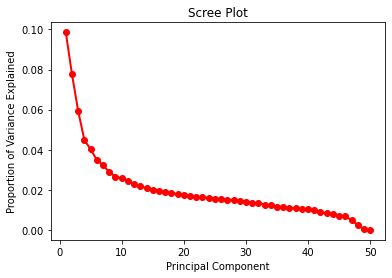

In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

array([0], dtype=int32)

In [ ]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_similarities.shape

In [ ]:

results = {}
for idx, row in ds.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
    similar_items = [(cosine_similarities[idx][i], ds['id'][i]) for i in similar_indices] 
    results[row['id']] = similar_items[1:]

In [ ]:
def item(id):  
    return ds.loc[ds['id'] == id]['description'].tolist()[0].split(' - ')[0] 
# Just reads the results out of the dictionary.def 
recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")   
    print("-------")    recs = results[item_id][:num]   
    for rec in recs: 
        print("Recommended: " + item(rec[1]) + " (score:" +      str(rec[0]) + ")")

In [ ]:
recommend(1,1)

In [4]:
len(ds.to_dict(orient='records'))

231637

In [5]:
ds

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [ ]:
linear_kernel(tfidf_matrix, tfidf_matrix)